**Welcome to your first assignment of Summer Analytics 2023! We hope you are excited to implement and test everything you have learnt up until now.<a href = "https://drive.google.com/file/d/1U73P58VAc4EXM98Or9feKnVx9I9FOP_L/view?usp=sharing"> The dataset</a> which you'll use includes information about Movies.**

 We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!
 
Let's get started with importing numpy, pandas, seaborn and matplotlib! 

Note - matplotlib should be imported with the command :

**import matplotlib.pyplot as plt**

Start by importing all important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the csv file and assign it to a variable .

In [2]:
imdb = pd.read_csv('imdb_top_1000.csv')

Display shape of dataframe

In [3]:
print("Shape of dataframe:", imdb.shape)

Shape of dataframe: (1000, 16)


Print all columns of dataframe

In [4]:
print("Columns of dataframe:", imdb.columns)

Columns of dataframe: Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


Remove the column 'Poster_Link' and update the dataframe.

In [5]:
imdb = imdb.drop('Poster_Link', axis=1)

Set the 'Series_Title' column as the index of dataframe

In [6]:
imdb = imdb.set_index('Series_Title')

Print a list of all the unique Genre

In [7]:
unique_genres = imdb['Genre'].unique()
print("Unique genres:", unique_genres)

Unique genres: ['Drama' 'Crime, Drama' 'Action, Crime, Drama' 'Action, Adventure, Drama'
 'Biography, Drama, History' 'Action, Adventure, Sci-Fi' 'Drama, Romance'
 'Western' 'Action, Sci-Fi' 'Biography, Crime, Drama'
 'Action, Adventure, Fantasy' 'Comedy, Drama, Thriller'
 'Adventure, Drama, Sci-Fi' 'Animation, Adventure, Family' 'Drama, War'
 'Crime, Drama, Fantasy' 'Comedy, Drama, Romance' 'Crime, Drama, Mystery'
 'Crime, Drama, Thriller' 'Action, Drama, Mystery'
 'Drama, Family, Fantasy' 'Drama, Music' 'Biography, Comedy, Drama'
 'Drama, Mystery, Sci-Fi' 'Biography, Drama, Music'
 'Crime, Mystery, Thriller' 'Animation, Adventure, Drama'
 'Animation, Drama, War' 'Adventure, Comedy, Sci-Fi'
 'Horror, Mystery, Thriller' 'Drama, Romance, War' 'Comedy, Drama, Family'
 'Animation, Drama, Fantasy' 'Action, Biography, Drama'
 'Animation, Action, Adventure' 'Drama, Western' 'Action, Adventure'
 'Comedy, Drama' 'Drama, Family' 'Drama, Mystery, Thriller'
 'Mystery, Thriller' 'Drama, Horror' 'D

1. What is the Number of Directors in the given dataset ? 

In [8]:
num_directors = len(imdb['Director'].unique())
print("Number of directors:", num_directors)

Number of directors: 548


2. What is the mean, median and standard deviation of IMDB rating in the dataset ?

In [9]:
imdb_mean = imdb['IMDB_Rating'].mean()
imdb_median = imdb['IMDB_Rating'].median()
imdb_std = imdb['IMDB_Rating'].std()
print("Mean IMDB rating:", imdb_mean)
print("Median IMDB rating:", imdb_median)
print("Standard deviation of IMDB rating:", imdb_std)

Mean IMDB rating: 7.949300000000012
Median IMDB rating: 7.9
Standard deviation of IMDB rating: 0.27549120749200917


3. Which director has directed the most number of movies?

In [10]:
director_counts = imdb['Director'].value_counts()
most_movies_director = director_counts.idxmax()
print("Director with the most number of movies:", most_movies_director)


Director with the most number of movies: Alfred Hitchcock


4. Name the Movie which has the highest Runtime ?

In [11]:
imdb['Runtime'] = imdb['Runtime'].str[:-3]
imdb['Runtime'] = pd.to_numeric(imdb['Runtime'])
movie_highest_runtime = imdb['Runtime'].idxmax()
print("Movie with the highest runtime:", movie_highest_runtime)

Movie with the highest runtime: Gangs of Wasseypur


5. How many movies are released after year 2000 and have IMDB rating > 8.5 ?

In [12]:
imdb['Released_Year'] = pd.to_numeric(imdb['Released_Year'], errors='coerce')
imdb['IMDB_Rating'] = imdb['IMDB_Rating'].astype(float)
filtered_imdb = imdb[(imdb['Released_Year'] > 2000) & (imdb['IMDB_Rating'] > 8.5)]
num_movies = len(filtered_imdb)
print("Number of movies released after 2000 with IMDB rating > 8.5:", num_movies)

Number of movies released after 2000 with IMDB rating > 8.5: 11


Using seaborn make different types of plots, observe the trend and answer the questions.
6. Make a countplot of Movies directed by all directors.

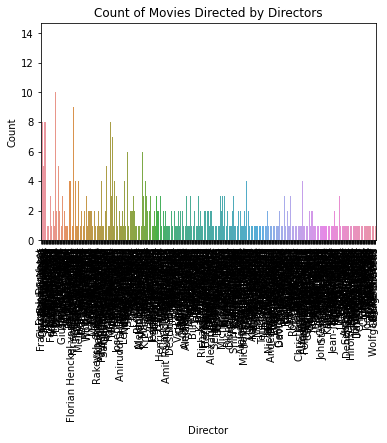

In [13]:
sns.countplot(data=imdb, x='Director')
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Count of Movies Directed by Directors')
plt.xticks(rotation=90)
plt.show()

7. Make a plot to analyze distribution of IMDB rating?

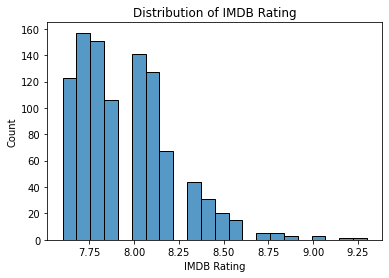

In [14]:
sns.histplot(imdb['IMDB_Rating'])
plt.xlabel('IMDB Rating')
plt.ylabel('Count')
plt.title('Distribution of IMDB Rating')
plt.show()

8. What type of Genre has the highest IMDB rating?

In [15]:
genre_mean_ratings = imdb.groupby('Genre')['IMDB_Rating'].mean()
highest_imdb_genre = genre_mean_ratings.idxmax()
print("Genre with the highest IMDB rating:", highest_imdb_genre)

Genre with the highest IMDB rating: Animation, Drama, War


9. Name the top 5 movies that have earned highest Meta score. 

In [16]:
top_5_movies_meta = imdb.nlargest(5, 'Meta_score')
print("Top 5 movies with the highest Meta score:")
for index in top_5_movies_meta.index:
    print(index)

Top 5 movies with the highest Meta score:
The Godfather
Casablanca
Rear Window
Lawrence of Arabia
Vertigo


10. Of which Genre movie has the highest Runtime?

In [17]:
genre_highest_runtime = imdb.groupby('Genre')['Runtime'].max()
genre_highest_runtime = genre_highest_runtime.idxmax()
print("Genre with the highest runtime:", genre_highest_runtime)

Genre with the highest runtime: Action, Comedy, Crime
